In [1]:
# Load data from huggingface
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]
 
# Extract specific metadata
abstracts = dataset["Abstracts"]
years = dataset["Years"]
categories = dataset["Categories"]
titles = dataset["Titles"]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
from sentence_transformers import SentenceTransformer
 
# We load our model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
 
# The abstracts are converted to vector representations
embeddings = embedding_model.encode(abstracts)

In [9]:
!pip install umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [13]:
import umap.umap_ as umap
 
# We instantiate our UMAP model
umap_model = umap.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
 
# We fit and transform our embeddings to reduce them
reduced_embeddings = umap_model.fit_transform(embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [14]:
from hdbscan import HDBSCAN
 
# We instantiate our HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom')
 
# We fit our model and extract the cluster labels
hdbscan_model.fit(reduced_embeddings)
labels = hdbscan_model.labels_

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

<Axes: xlabel='x', ylabel='y'>

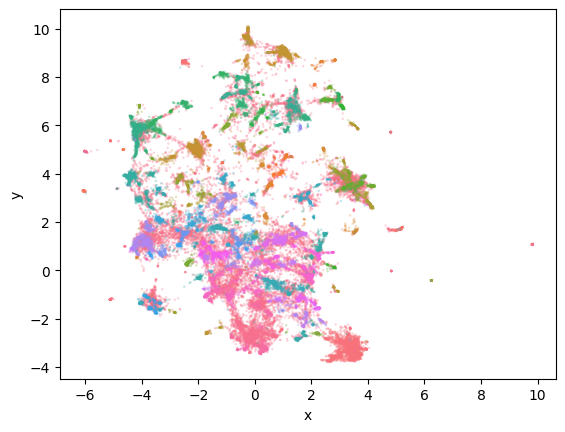

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
 
# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = umap.UMAP(n_neighbors=15, n_components=2, 
min_dist=0.0, metric='cosine').fit_transform(embeddings)
df = pd.DataFrame(np.hstack([reduced_embeddings, labels.reshape(-1, 1)]),
     columns=["x", "y", "cluster"]).sort_values("cluster")
 
# Visualize clusters
df.cluster = df.cluster.astype(int).astype(str)
sns.scatterplot(data=df, x='x', y='y', hue='cluster', 
   linewidth=0, legend=False, s=3, alpha=0.3)

In [23]:
for index in np.where(labels==1)[0][:3]:
    print(abstracts[index])

  In this paper, a supervised learning technique for extracting keyphrases of
Arabic documents is presented. The extractor is supplied with linguistic
knowledge to enhance its efficiency instead of relying only on statistical
information such as term frequency and distance. During analysis, an annotated
Arabic corpus is used to extract the required lexical features of the document
words. The knowledge also includes syntactic rules based on part of speech tags
and allowed word sequences to extract the candidate keyphrases. In this work,
the abstract form of Arabic words is used instead of its stem form to represent
the candidate terms. The Abstract form hides most of the inflections found in
Arabic words. The paper introduces new features of keyphrases based on
linguistic knowledge, to capture titles and subtitles of a document. A simple
ANOVA test is used to evaluate the validity of selected features. Then, the
learning model is built using the LDA - Linear Discriminant Analysis - and


### Topic Modeling

#### BERTopic

In [24]:
from bertopic import BERTopic
 
# Instantiate our topic model
topic_model = BERTopic()
 
# Fit our topic model on a list of documents
topic_model.fit(documents)

ImportError: cannot import name 'UMAP' from 'umap' (/Users/linghuang/miniconda3/envs/transformers/lib/python3.11/site-packages/umap/__init__.py)